# Face Recognition 

## OpenCV

In [1]:
from PIL import Image
import cv2
import numpy as np
import os
import zipfile

Let's create the path

In [2]:
path = "../../Computer Vision Masterclass/Datasets/yalefaces.zip"
zip_object = zipfile.ZipFile(file=path, mode = 'r')
zip_object.extractall('./')
zip_object.close()

### Pre-processing the images

In [3]:
print(os.listdir("yalefaces/train"))

['subject01.glasses.gif', 'subject01.leftlight.gif', 'subject01.noglasses.gif', 'subject01.normal.gif', 'subject01.rightlight.gif', 'subject01.sad.gif', 'subject01.sleepy.gif', 'subject01.surprised.gif', 'subject01.wink.gif', 'subject02.glasses.gif', 'subject02.happy.gif', 'subject02.noglasses.gif', 'subject02.normal.gif', 'subject02.rightlight.gif', 'subject02.sad.gif', 'subject02.sleepy.gif', 'subject02.surprised.gif', 'subject02.wink.gif', 'subject03.centerlight.gif', 'subject03.happy.gif', 'subject03.noglasses.gif', 'subject03.normal.gif', 'subject03.rightlight.gif', 'subject03.sad.gif', 'subject03.sleepy.gif', 'subject03.surprised.gif', 'subject03.wink.gif', 'subject04.centerlight.gif', 'subject04.glasses.gif', 'subject04.happy.gif', 'subject04.noglasses.gif', 'subject04.normal.gif', 'subject04.rightlight.gif', 'subject04.sad.gif', 'subject04.sleepy.gif', 'subject04.wink.gif', 'subject05.centerlight.gif', 'subject05.glasses.gif', 'subject05.happy.gif', 'subject05.leftlight.gif', '

In [4]:
def get_image_data():
  paths = [os.path.join('yalefaces/train', f) for f in os.listdir('yalefaces/train')]
  # print(paths)
  faces = []
  ids = []
  for path in paths:
    # print(path)
    image = Image.open(path).convert('L')
    # print(type(image))
    image_np = np.array(image, 'uint8')
    # print(type(image_np))
    id = int(os.path.split(path)[1].split('.')[0].replace('subject', ''))
    # print(id)
    ids.append(id)
    faces.append(image_np)

  return np.array(ids), faces

In [5]:
ids, faces = get_image_data()

In [6]:
faces[0], faces[0].shape

(array([[130, 130, 130, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 252, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8),
 (243, 320))

### Training the LBPH classifier

In [7]:
lbph_classifier = cv2.face.LBPHFaceRecognizer_create(
    radius = 5,
    neighbors = 14,
    grid_x = 9,grid_y = 9
)
lbph_classifier.train(faces, ids)
lbph_classifier.write('lbph_classifier.yml')

## Recognizing faces

In [8]:
lbph_face_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_face_classifier.read('lbph_classifier.yml')

In [9]:
test_image = 'yalefaces/test/subject10.sad.gif'

In [10]:
image = Image.open(test_image).convert('L')
image_np = np.array(image, 'uint8')
image_np

array([[130, 130, 130, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 241, 255, 255],
       [255, 255, 255, ..., 234, 237, 252],
       [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8)

In [11]:
prediction = lbph_face_classifier.predict(image_np)
prediction

(10, 36.85593915136333)

The first number is the class. The second value is the confidence

## Evaluating the classifier

In [12]:
paths = [os.path.join('yalefaces/test', f) for f in os.listdir('yalefaces/test')]
predictions = []
expected_outputs = []
for path in paths:
  # print(path)
  image = Image.open(path).convert('L')
  image_np = np.array(image, 'uint8')
  prediction,   _ = lbph_face_classifier.predict(image_np)
  expected_output = int( os.path.split(path)[1].split('.')[0].replace('subject', ''))

  predictions.append(prediction)
  expected_outputs.append(expected_output)

In [13]:
predictions = np.array(predictions)
expected_outputs = np.array(expected_outputs)

In [14]:
predictions

array([ 4,  1,  4, 12,  3,  9,  5,  4,  5,  5,  6, 14,  7,  9,  8,  4,  7,
        9,  4, 10, 11, 11, 12, 12, 13, 13, 14, 14,  7, 15])

In [15]:
expected_outputs

array([ 1,  1,  2,  2,  3,  3,  4,  4,  5,  5,  6,  6,  7,  7,  8,  8,  9,
        9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15])

In [16]:
from sklearn.metrics import accuracy_score

accuracy_score(expected_outputs, predictions)

0.6333333333333333

In [17]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(expected_outputs, predictions)
cm

array([[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]], dtype=int64)

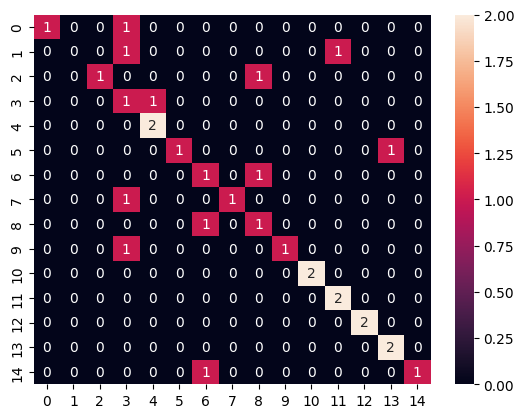

In [18]:
import seaborn
seaborn.heatmap(cm, annot = True);

## Dlib

In [1]:
import dlib
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

### Detecting facil points

In [2]:
os.listdir("../../Computer Vision Masterclass/Weights/")

['dlib_face_recognition_resnet_model_v1.dat',
 'mmod_human_face_detector.dat',
 'network_emotions.json',
 'pose_deploy_linevec_faster_4_stages.prototxt',
 'pose_iter_160000.caffemodel',
 'shape_predictor_68_face_landmarks.dat',
 'weights_emotions.hdf5']

In [3]:
face_detector = dlib.get_frontal_face_detector()
points_detector = dlib.shape_predictor("../../Computer Vision Masterclass/Weights/shape_predictor_68_face_landmarks.dat")

In [4]:
image = cv2.imread("../../Computer Vision Masterclass/Images/people2.jpg")

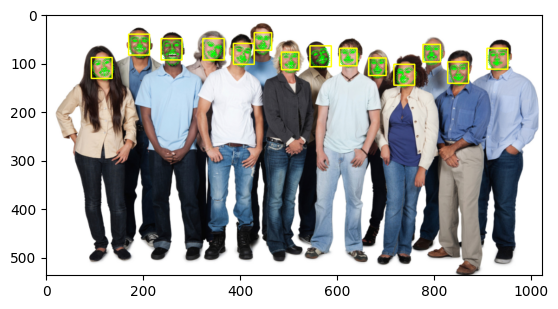

In [5]:
face_detection = face_detector(image, 1)
for face in face_detection:
    points = points_detector(image, face)
    for point in points.parts():
        cv2.circle(image, (point.x, point.y), 2, (0, 255, 0), 1)
    
    l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
    cv2.rectangle(image, (l, t), (r, b), (0, 255, 255), 2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

### Detecting facial descriptors

In [6]:
face_detector = dlib.get_frontal_face_detector()
points_detector = dlib.shape_predictor("../../Computer Vision Masterclass/Weights/shape_predictor_68_face_landmarks.dat")
face_descriptor_extractor = dlib.face_recognition_model_v1("../../Computer Vision Masterclass/Weights/dlib_face_recognition_resnet_model_v1.dat")
# resnet is cause is a convolutional network architecture

In [25]:
index = {}
idx = 0
face_descriptors = None

paths = [os.path.join('yalefaces/train', f) for f in os.listdir('yalefaces/train')]
for path in paths:
    
    image = Image.open(path).convert('RGB')
    image_np = np.array(image, 'uint8')
    face_detection = face_detector(image_np, 1)
    for face in face_detection:
        l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
        cv2.rectangle(image_np, (l, t), (r, b), (0, 255, 255), 2)
        
        points = points_detector(image_np, face)
        for point in points.parts():
            cv2.circle(image_np, (point.x, point.y), 2, (0,255,0), 2)
            
        face_descriptor = face_descriptor_extractor.compute_face_descriptor(image_np, points)
        
        face_descriptor = [f for f in face_descriptor]
        
        face_descriptor = np.asarray(face_descriptor, dtype=np.float64)
        
        face_descriptor = face_descriptor[np.newaxis, :]
        
        if face_descriptors is None:
            face_descriptors = face_descriptor
        else:
            face_descriptors = np.concatenate((face_descriptors, face_descriptor), axis = 0)
            
            index[idx] = path
            idx += 1
print(index)
        
    # plt.imshow(cv2.cvtColor(image_np, cv2.COLOR_BGR2RGB))
    # plt.show()  
  

{0: 'yalefaces/train\\subject01.leftlight.gif', 1: 'yalefaces/train\\subject01.noglasses.gif', 2: 'yalefaces/train\\subject01.normal.gif', 3: 'yalefaces/train\\subject01.sad.gif', 4: 'yalefaces/train\\subject01.sleepy.gif', 5: 'yalefaces/train\\subject01.surprised.gif', 6: 'yalefaces/train\\subject01.wink.gif', 7: 'yalefaces/train\\subject02.glasses.gif', 8: 'yalefaces/train\\subject02.happy.gif', 9: 'yalefaces/train\\subject02.noglasses.gif', 10: 'yalefaces/train\\subject02.normal.gif', 11: 'yalefaces/train\\subject02.rightlight.gif', 12: 'yalefaces/train\\subject02.sad.gif', 13: 'yalefaces/train\\subject02.sleepy.gif', 14: 'yalefaces/train\\subject02.surprised.gif', 15: 'yalefaces/train\\subject02.wink.gif', 16: 'yalefaces/train\\subject03.centerlight.gif', 17: 'yalefaces/train\\subject03.happy.gif', 18: 'yalefaces/train\\subject03.noglasses.gif', 19: 'yalefaces/train\\subject03.normal.gif', 20: 'yalefaces/train\\subject03.rightlight.gif', 21: 'yalefaces/train\\subject03.sad.gif', 22

In [9]:
face_descriptors.shape

(132, 128)

In [11]:
face_descriptors

array([[-0.12983891,  0.13344824,  0.07791361, ...,  0.03998763,
         0.05191987,  0.04395225],
       [-0.10084536,  0.13905799,  0.02475809, ...,  0.0607829 ,
         0.08737518,  0.07039221],
       [-0.19993523,  0.12648477,  0.02382274, ...,  0.02326725,
         0.04994909,  0.04716775],
       ...,
       [-0.16664046,  0.05346555,  0.03087626, ...,  0.06558359,
         0.05369752,  0.08640786],
       [-0.18257314,  0.04456469,  0.02753848, ...,  0.00724253,
         0.02633589,  0.04790654],
       [-0.13990454,  0.07209966,  0.02143186, ...,  0.04687773,
         0.01201061,  0.04154287]])

### Calculating the distances between faces

In [28]:
index

{0: 'yalefaces/train\\subject01.leftlight.gif',
 1: 'yalefaces/train\\subject01.noglasses.gif',
 2: 'yalefaces/train\\subject01.normal.gif',
 3: 'yalefaces/train\\subject01.sad.gif',
 4: 'yalefaces/train\\subject01.sleepy.gif',
 5: 'yalefaces/train\\subject01.surprised.gif',
 6: 'yalefaces/train\\subject01.wink.gif',
 7: 'yalefaces/train\\subject02.glasses.gif',
 8: 'yalefaces/train\\subject02.happy.gif',
 9: 'yalefaces/train\\subject02.noglasses.gif',
 10: 'yalefaces/train\\subject02.normal.gif',
 11: 'yalefaces/train\\subject02.rightlight.gif',
 12: 'yalefaces/train\\subject02.sad.gif',
 13: 'yalefaces/train\\subject02.sleepy.gif',
 14: 'yalefaces/train\\subject02.surprised.gif',
 15: 'yalefaces/train\\subject02.wink.gif',
 16: 'yalefaces/train\\subject03.centerlight.gif',
 17: 'yalefaces/train\\subject03.happy.gif',
 18: 'yalefaces/train\\subject03.noglasses.gif',
 19: 'yalefaces/train\\subject03.normal.gif',
 20: 'yalefaces/train\\subject03.rightlight.gif',
 21: 'yalefaces/train\\s

In [16]:
np.linalg.norm(face_descriptors[130] - face_descriptors[111])

0.574977975098285

In [17]:
np.linalg.norm(face_descriptors[130] - face_descriptors[131])

0.4131802971253286

In [26]:
np.linalg.norm(face_descriptors[1] - face_descriptors[0])

0.3780030936373462

In [27]:
np.linalg.norm(face_descriptors[1] - face_descriptors, axis = 1)

array([0.37800309, 0.        , 0.45602951, 0.45530556, 0.40184279,
       0.54136125, 0.41906309, 0.48714955, 0.5402458 , 0.47240062,
       0.52824482, 0.52824482, 0.43078056, 0.46862363, 0.48191727,
       0.4652451 , 0.44206985, 0.53885713, 0.54139118, 0.5680851 ,
       0.5680851 , 0.44665643, 0.56301776, 0.63719126, 0.54703899,
       0.54509647, 0.66942682, 0.68234627, 0.66165574, 0.69344196,
       0.71352251, 0.54442617, 0.71352251, 0.67896718, 0.61111081,
       0.49821245, 0.65923954, 0.56181053, 0.49371115, 0.5616666 ,
       0.57067663, 0.53472059, 0.54053555, 0.65234159, 0.61131642,
       0.62416973, 0.62416973, 0.69858121, 0.54026468, 0.64573131,
       0.62407622, 0.57200765, 0.63792183, 0.57813922, 0.62321447,
       0.62321447, 0.57415679, 0.64402138, 0.65817472, 0.63043972,
       0.61311412, 0.55587079, 0.66802235, 0.57224096, 0.58271963,
       0.71003786, 0.61022997, 0.65292518, 0.55696526, 0.66961369,
       0.50026184, 0.51778823, 0.47244621, 0.40873487, 0.52007

Doing that we got all the distances

### Detecting faces with Dlib

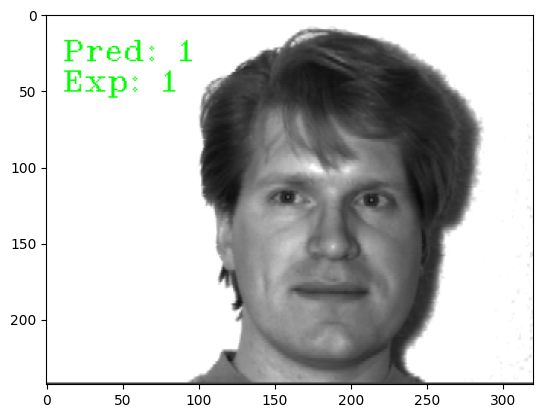

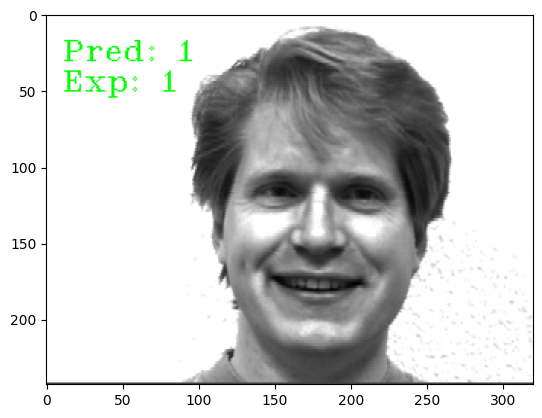

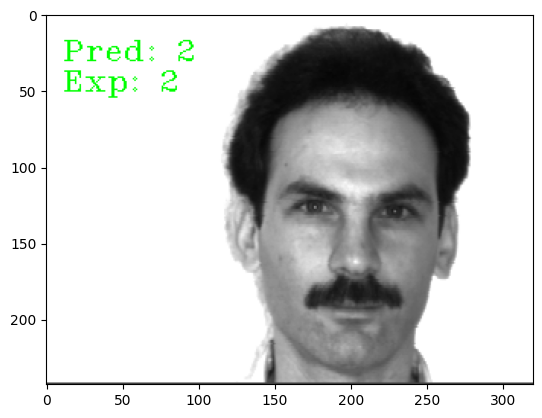

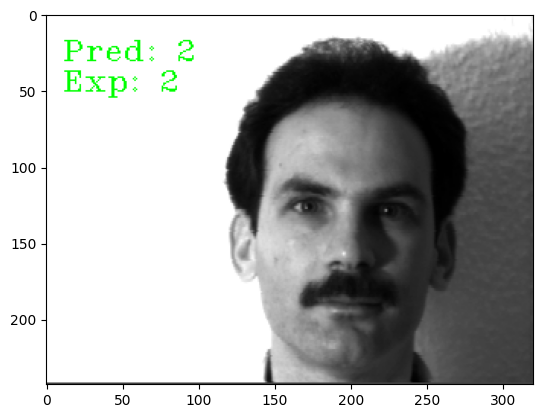

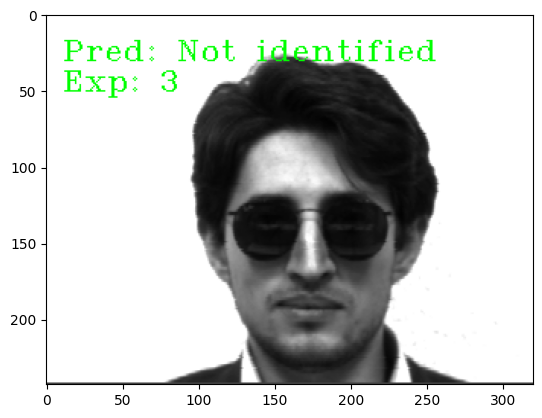

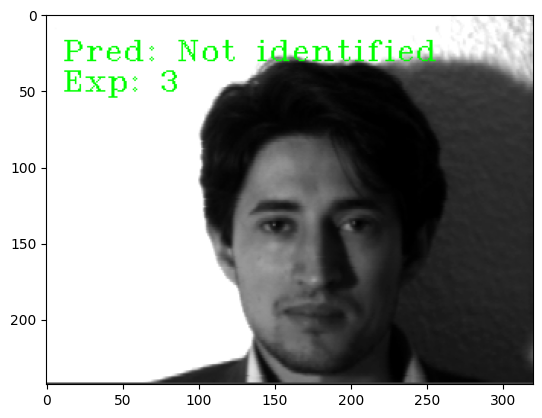

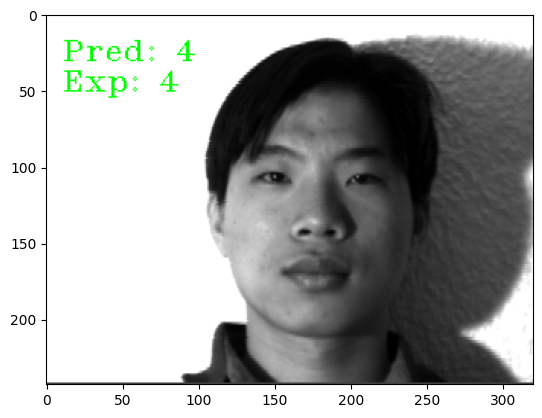

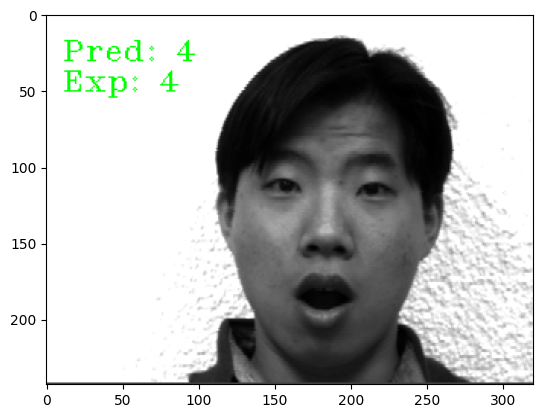

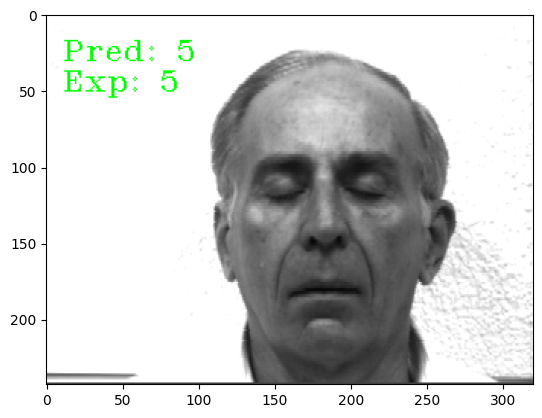

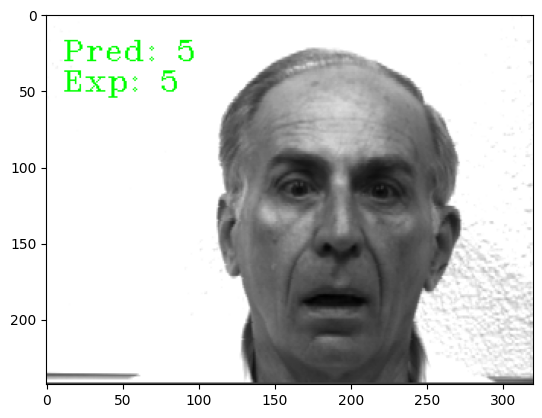

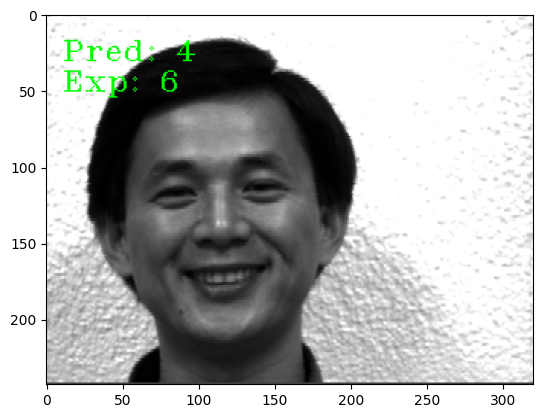

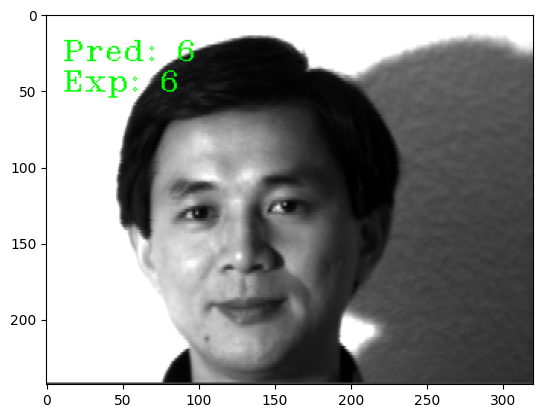

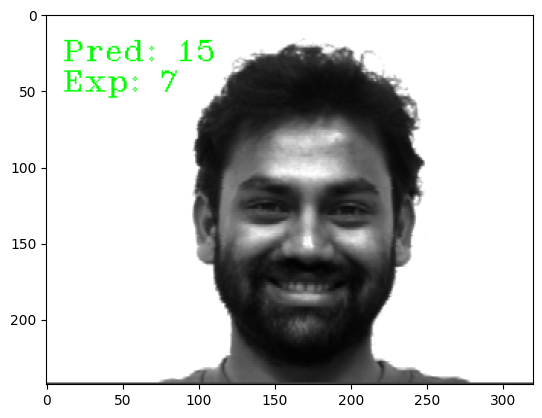

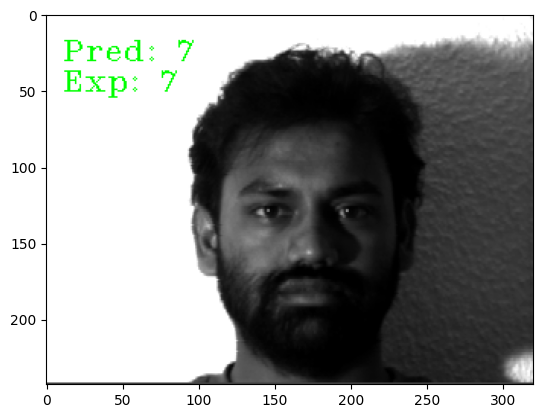

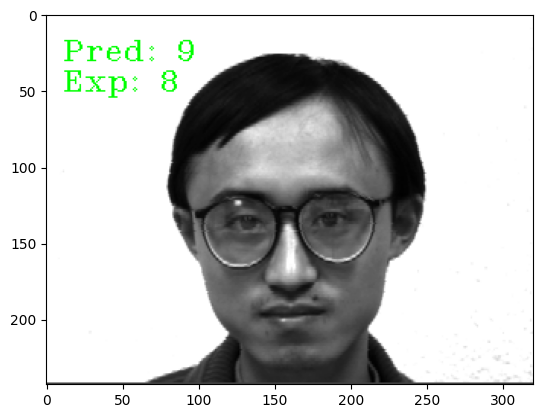

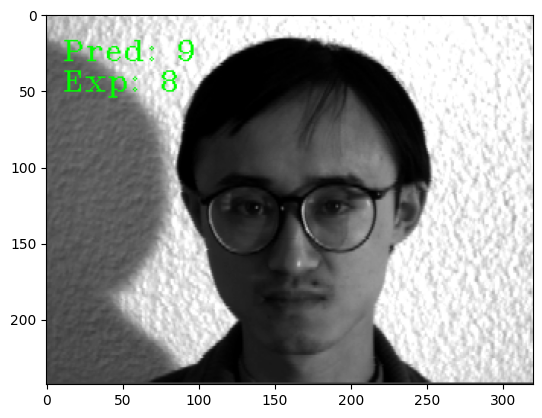

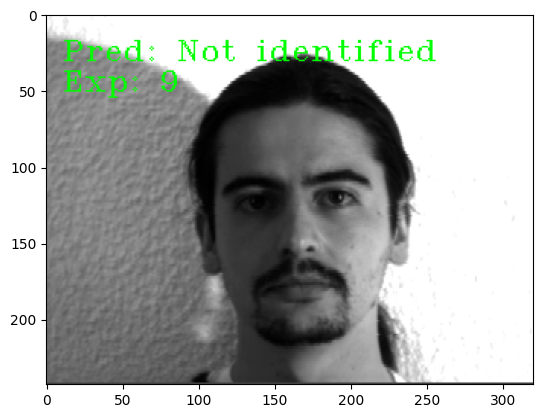

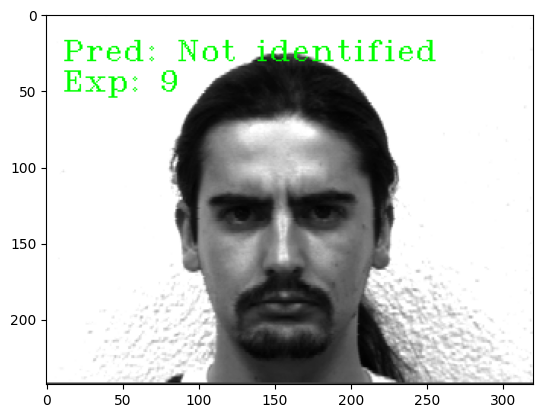

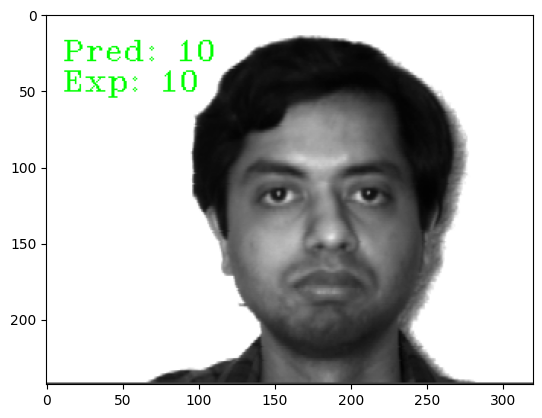

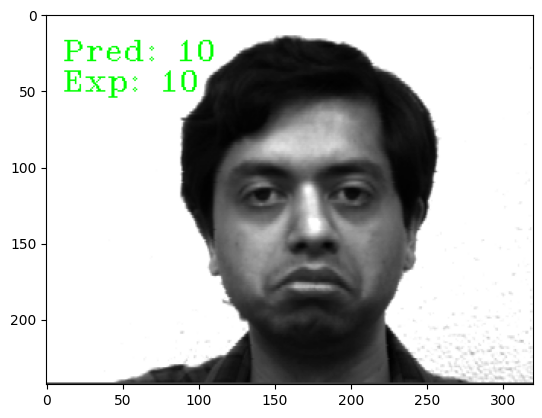

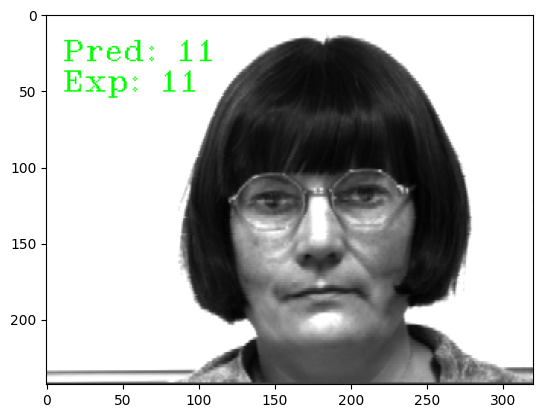

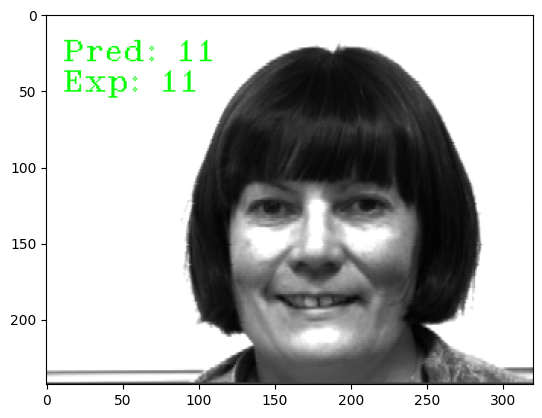

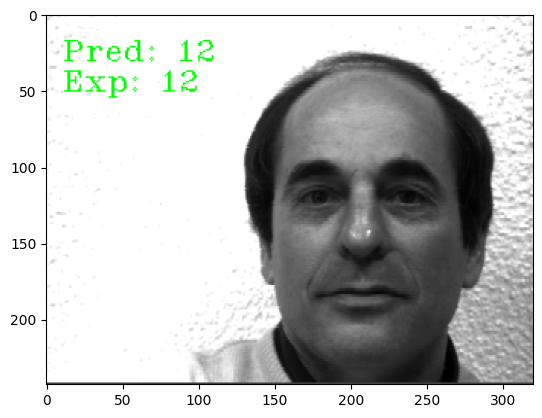

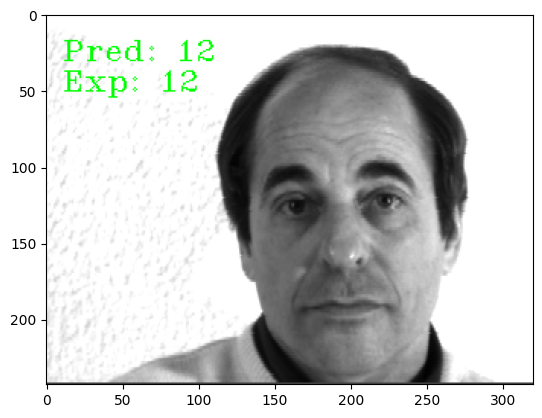

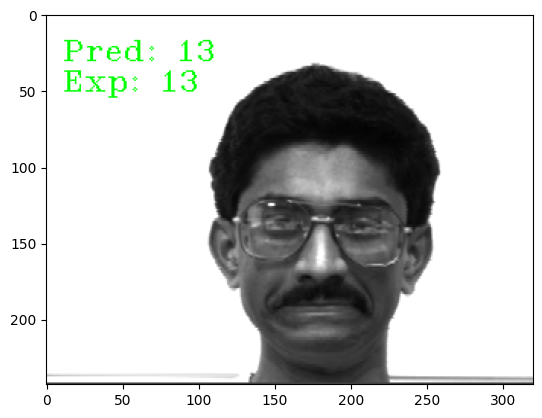

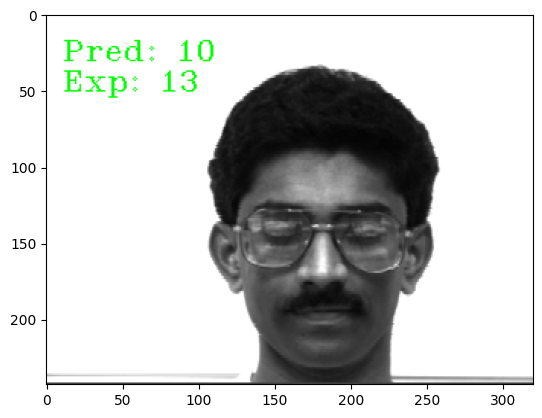

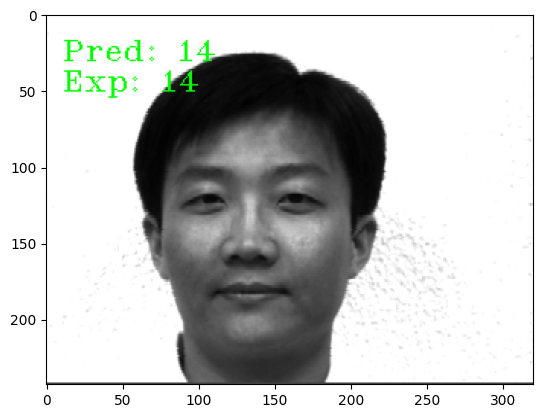

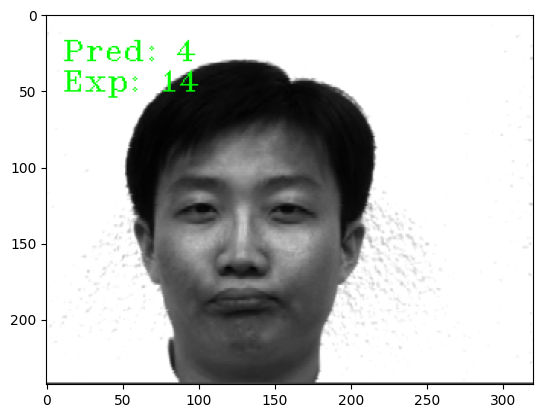

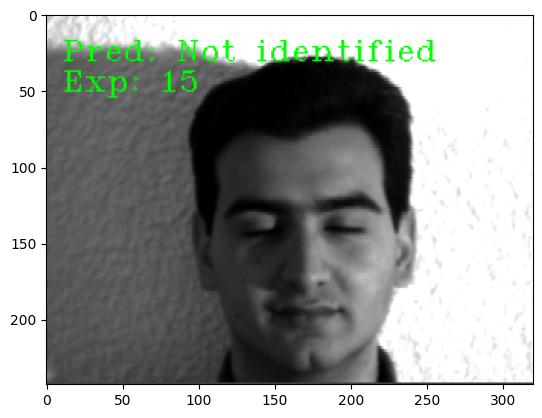

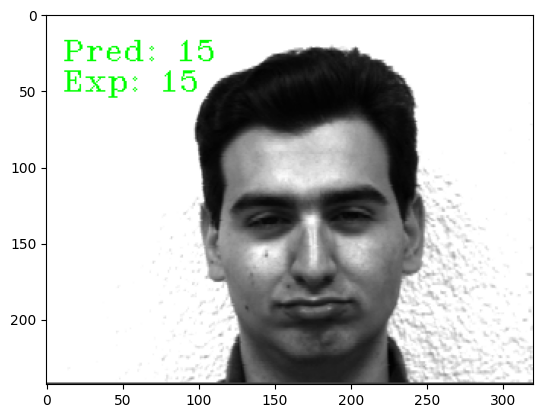

In [38]:
threshold = 0.6
predictions = []
expected_outputs = []

paths = [os.path.join('yalefaces/test', f) for f in os.listdir('yalefaces/test')]
for path in paths:
    image = Image.open(path).convert('RGB')
    image_np = np.array(image, 'uint8')
    
    face_detection = face_detector(image_np, 1)
    for face in face_detection:
        points = points_detector(image_np, face)
        face_descriptor = face_descriptor_extractor.compute_face_descriptor(image_np, points)
        
        face_descriptor = [f for f in face_descriptor]
        face_descriptor = np.asarray(face_descriptor, dtype=np.float64)
        face_descriptor = face_descriptor[np.newaxis, :]
        
        distances = np.linalg.norm(face_descriptor - face_descriptors, axis = 1)
        min_index = np.argmin(distances)
        min_distance = distances[min_index]
        
        if min_distance <= threshold:
            name_pred = int(os.path.split(index[min_index])[1].split('.')[0].replace('subject', ''))
        else:
            name_pred = 'Not identified'
        
        name_real = int(os.path.split(path)[1].split('.')[0].replace('subject', ''))
        
        predictions.append(name_pred)
        expected_outputs.append(name_real)
        
        cv2.putText(image_np, "Pred: " + str(name_pred), (10 , 30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
        cv2.putText(image_np, "Exp: " + str(name_real), (10 , 50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
        
        
    plt.imshow(cv2.cvtColor(image_np, cv2.COLOR_BGR2RGB))
    plt.show()  
    
predictions = np.array(predictions)
expected_outputs = np.array(expected_outputs)

In [39]:
predictions

array(['1', '1', '2', '2', 'Not identified', 'Not identified', '4', '4',
       '5', '5', '4', '6', '15', '7', '9', '9', 'Not identified',
       'Not identified', '10', '10', '11', '11', '12', '12', '13', '10',
       '14', '4', 'Not identified', '15'], dtype='<U14')

In [40]:
expected_outputs

array([ 1,  1,  2,  2,  3,  3,  4,  4,  5,  5,  6,  6,  7,  7,  8,  8,  9,
        9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15])

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(expected_outputs, predictions)

0.0